In [28]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.manual_seed(42)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [29]:
def plotPredictions(X_train,
                    y_train,
                    X_test,
                    y_test,
                    preds=None):
  plt.figure(figsize=(10, 7))

  plt.scatter(X_train, y_train, c='b', s=4, label="Train Data")
  plt.scatter(X_test, y_test, c='g', s=4, label="Test Data")

  if preds is not None:
    plt.scatter(X_test, preds, c='g', s=4, label="Predictions")

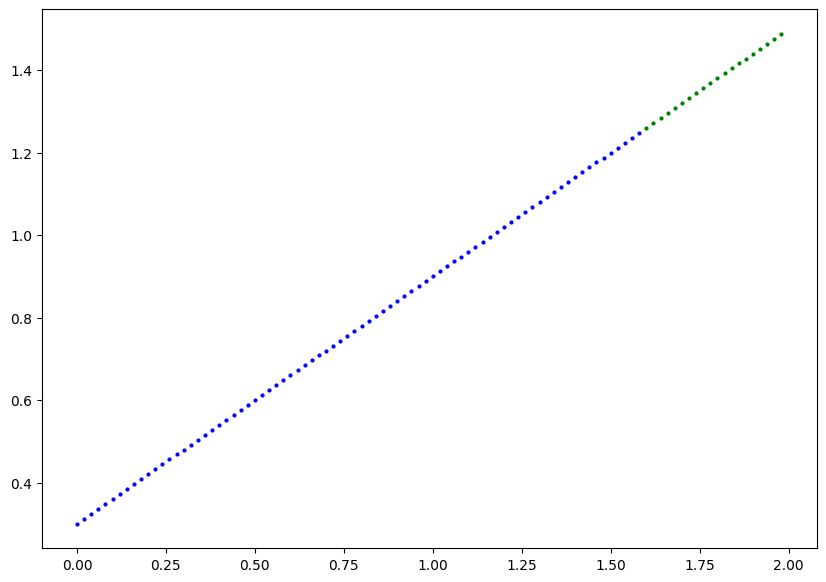

In [30]:
weight = 0.6
bias = 0.3
step = 0.02
start = 0
stop = 2
X = torch.arange(start, stop, step).unsqueeze(dim=1)
y = weight * X + bias

split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

plotPredictions(X_train, y_train, X_test, y_test)

In [32]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias


In [34]:
model = LinearRegression()

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)

In [35]:
epochs = 200

for epoch in range(epochs):
  model.train()

  y_preds = model(X_train)

  loss = loss_fn(y_preds, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()

  with torch.inference_mode():
    y_test_preds = model(X_test)

    loss_test = loss_fn(y_test_preds, y_test)

  if epoch % 10 == 0:
    print(f"Train Loss: {loss} | Test Loss: {loss_test}")

Train Loss: 0.35844171047210693 | Test Loss: 0.6998384594917297
Train Loss: 0.19994942843914032 | Test Loss: 0.4615805745124817
Train Loss: 0.10019689798355103 | Test Loss: 0.2681957185268402
Train Loss: 0.06257094442844391 | Test Loss: 0.15262702107429504
Train Loss: 0.05014671012759209 | Test Loss: 0.10350556671619415
Train Loss: 0.040937505662441254 | Test Loss: 0.08036892861127853
Train Loss: 0.031838323920965195 | Test Loss: 0.061273716390132904
Train Loss: 0.022747652605175972 | Test Loss: 0.04353775829076767
Train Loss: 0.013652728870511055 | Test Loss: 0.02512216567993164
Train Loss: 0.004563209600746632 | Test Loss: 0.006715595722198486
Train Loss: 0.012494919821619987 | Test Loss: 0.0011042595142498612
Train Loss: 0.012494919821619987 | Test Loss: 0.0011042595142498612
Train Loss: 0.012494919821619987 | Test Loss: 0.0011042595142498612
Train Loss: 0.012494919821619987 | Test Loss: 0.0011042595142498612
Train Loss: 0.012494919821619987 | Test Loss: 0.0011042595142498612
Train 

In [36]:
model.state_dict()

OrderedDict([('weight', tensor([0.5895])), ('bias', tensor([0.2958]))])

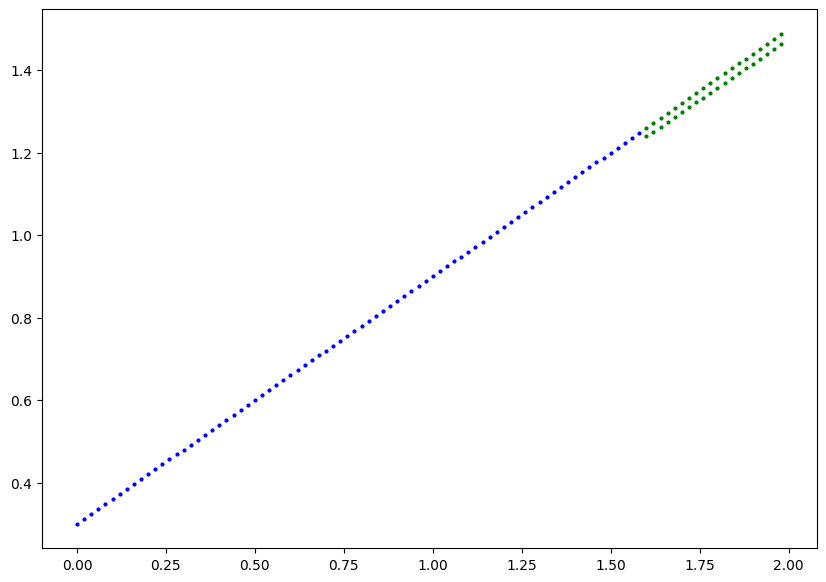

In [37]:
plotPredictions(X_train, y_train, X_test, y_test, y_test_preds)